<a href="https://colab.research.google.com/github/mickee00000/201951090_Research_Internship_2022/blob/main/201951090_Summer_Research_Intern_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras
import PIL
import cv2

In [3]:
import pathlib
import os
import sys

In [4]:
import requests
import IPython

In [5]:
url = 'https://raw.githubusercontent.com/mickee00000/Research_Internship/main/part1.jpeg'
r = requests.get(url, allow_redirects=True)
open('part1.jpeg', 'wb').write(r.content)

94205

In [6]:
hindi_data = tf.keras.utils.get_file('hindi_text', origin = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00389/DevanagariHandwrittenCharacterDataset.zip', cache_dir='.', extract=True, archive_format='zip')
hindi_data

80429056/80417803 [==============================] - 2s 0us/step


'./datasets/hindi_text'

In [7]:
hindi_data_train = pathlib.Path(r'datasets/DevanagariHandwrittenCharacterDataset/Train')
hindi_data_train

PosixPath('datasets/DevanagariHandwrittenCharacterDataset/Train')

In [8]:
hindi_data_test = pathlib.Path(r'datasets/DevanagariHandwrittenCharacterDataset/Test')
hindi_data_test

PosixPath('datasets/DevanagariHandwrittenCharacterDataset/Test')

In [9]:
image_count = len(list(hindi_data_train.glob('*/*.png')))
image_count

78200

In [10]:
len(list(hindi_data_train.glob('character_3_ga/*')))

1700

In [11]:
hindi_letters_dict_train = {
    'sa': list(hindi_data_train.glob('character_32_patalosaw/*')),
    're': list(hindi_data_train.glob('character_27_ra/*')),
    'ga': list(hindi_data_train.glob('character_3_ga/*')),
    'ma': list(hindi_data_train.glob('character_25_ma/*')),
    'pa': list(hindi_data_train.glob('character_21_pa/*')),
    'dha': list(hindi_data_train.glob('character_19_dha/*')),
    'ni': list(hindi_data_train.glob('character_20_na/*')),
    #'zero': list(hindi_data_train.glob('digit_0/*')),
    #'one': list(hindi_data_train.glob('digit_1/*')),
    #'two': list(hindi_data_train.glob('digit_2/*')),
    #'three': list(hindi_data_train.glob('digit_3/*')),
    #'four': list(hindi_data_train.glob('digit_4/*')),
    #'five': list(hindi_data_train.glob('digit_5/*')),
    #'six': list(hindi_data_train.glob('digit_6/*')),
    #'seven': list(hindi_data_train.glob('digit_7/*')),
    #'eight': list(hindi_data_train.glob('digit_8/*')),
    #'nine': list(hindi_data_train.glob('digit_9/*')),
}

In [12]:
hindi_letters_dict_test = {
    'sa': list(hindi_data_test.glob('character_32_patalosaw/*')),
    're': list(hindi_data_test.glob('character_27_ra/*')),
    'ga': list(hindi_data_test.glob('character_3_ga/*')),
    'ma': list(hindi_data_test.glob('character_25_ma/*')),
    'pa': list(hindi_data_test.glob('character_21_pa/*')),
    'dha': list(hindi_data_test.glob('character_19_dha/*')),
    'ni': list(hindi_data_test.glob('character_20_na/*')),
    #'zero': list(hindi_data_test.glob('digit_0/*')),
    #'one': list(hindi_data_test.glob('digit_1/*')),
    #'two': list(hindi_data_test.glob('digit_2/*')),
    #'three': list(hindi_data_test.glob('digit_3/*')),
    #'four': list(hindi_data_test.glob('digit_4/*')),
    #'five': list(hindi_data_test.glob('digit_5/*')),
    #'six': list(hindi_data_test.glob('digit_6/*')),
    #'seven': list(hindi_data_test.glob('digit_7/*')),
    #'eight': list(hindi_data_test.glob('digit_8/*')),
    #'nine': list(hindi_data_test.glob('digit_9/*')),
}

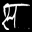

In [13]:
PIL.Image.open(hindi_letters_dict_train['sa'][0])

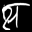

In [14]:
PIL.Image.open(hindi_letters_dict_train['sa'][5])

In [15]:
hindi_label_dict = {
    'sa': 0,
    're': 1,
    'ga': 2,
    'ma': 3,
    'pa': 4,
    'dha': 5,
    'ni': 6,
    #'zero': 7,
    #'one': 8,
    #'two': 9,
    #'three': 10,
    #'four': 11,
    #'five': 12,
    #'six': 13,
    #'seven': 14,
    #'eight': 15,
    #'nine': 16,
}

In [16]:
hindi_name_dict = {
     0: 'sa',
     1: 're',
     2: 'ga',
     3: 'ma',
     4: 'pa',
     5: 'dha',
     6: 'ni',
     #7: 'zero',
     #8: 'one',
     #9: 'two',
     #10: 'three',
     #11: 'four',
     #12: 'five',
     #13: 'six',
     #14: 'seven',
     #15: 'eight',
     #16: 'nine',
}

In [17]:
img = cv2.imread(str(hindi_letters_dict_train['re'][0]))


In [18]:
img

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [180, 180, 180],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [19]:
X_train = []
y_train = []

In [20]:
for key, value_list in hindi_letters_dict_train.items():
    for value in value_list:
        img = cv2.imread(str(value))
        img = cv2.resize(img,(32,32))
        _, img = cv2.threshold(img, 127,255, cv2.THRESH_BINARY_INV)
        X_train.append(img)
        y_train.append(hindi_label_dict[key])

In [21]:
X_test = []
y_test = []

In [22]:
for key, value_list in hindi_letters_dict_test.items():
    for value in value_list:
        img = cv2.imread(str(value))
        img = cv2.resize(img,(32,32))
        _, img = cv2.threshold(img, 127,255, cv2.THRESH_BINARY_INV)
        X_test.append(img)
        y_test.append(hindi_label_dict[key])

In [23]:
len(X_train)

11900

In [24]:
len(y_train)

11900

In [25]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [26]:
X_test = np.array(X_test)
y_test = np.array(y_test)

In [27]:
X_train.shape

(11900, 32, 32, 3)

In [28]:
X_test.shape

(2100, 32, 32, 3)

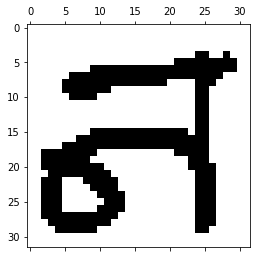

In [29]:
plt.matshow(X_train[11110])

In [30]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [31]:
hindi_name_dict[y_train[11110]]

'ni'

In [32]:
X_train_scaled.shape

(11900, 32, 32, 3)

In [33]:
#X_train_scaled_flat = np.reshape(#X_train_scaled, (28900, 32*32*3))

In [34]:
y_train[0]

0

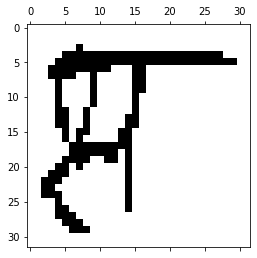

In [35]:
plt.matshow(X_train[0])

In [36]:
data_augmentation = keras.Sequential(
    [
        keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(32,32,3,)),
        keras.layers.experimental.preprocessing.RandomRotation(0.2),
        keras.layers.experimental.preprocessing.RandomZoom(0.1),
      
    ]
)

In [37]:
model = keras.Sequential([
    data_augmentation,
    

    keras.layers.Conv2D(filters = 32,kernel_size = (3,3),strides = 1,activation = "relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="same"),

    keras.layers.Conv2D(filters = 32,kernel_size = (3,3),strides = 1,activation = "relu",),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="same"),

    keras.layers.Conv2D(filters = 64,kernel_size = (3,3),strides = 1,activation = "relu",),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="same"),

    keras.layers.Conv2D(filters = 64,kernel_size = (3,3),strides = 1,activation = "relu",),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2),strides=(2, 2), padding="same"),
    keras.layers.Flatten(),


    keras.layers.Dense(128, activation = "relu", kernel_initializer = "uniform"),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(64, activation = "relu", kernel_initializer = "uniform"),
    keras.layers.BatchNormalization(),

    keras.layers.Dense(7,activation = "softmax"),

])

In [38]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [39]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 32)      

In [40]:
model.fit(X_train_scaled, y_train, epochs = 100)

Epoch 1/100
372/372 [==============================] - 16s 8ms/step - loss: 1.0832 - accuracy: 0.6108
Epoch 2/100
372/372 [==============================] - 3s 8ms/step - loss: 0.5213 - accuracy: 0.8132
Epoch 3/100
372/372 [==============================] - 3s 8ms/step - loss: 0.3646 - accuracy: 0.8738
Epoch 4/100
372/372 [==============================] - 3s 8ms/step - loss: 0.3072 - accuracy: 0.8938
Epoch 5/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2594 - accuracy: 0.9126
Epoch 6/100
372/372 [==============================] - 3s 8ms/step - loss: 0.2288 - accuracy: 0.9221
Epoch 7/100
372/372 [==============================] - 3s 9ms/step - loss: 0.1970 - accuracy: 0.9340
Epoch 8/100
372/372 [==============================] - 3s 8ms/step - loss: 0.1980 - accuracy: 0.9357
Epoch 9/100
372/372 [==============================] - 3s 7ms/step - loss: 0.1804 - accuracy: 0.9390
Epoch 10/100
372/372 [==============================] - 3s 8ms/step - loss: 0.1710 - accur

In [41]:
model.evaluate(X_test_scaled, y_test)

66/66 [==============================] - 1s 5ms/step - loss: 0.0213 - accuracy: 0.9919


[0.021313631907105446, 0.9919047355651855]

In [42]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 32, 32, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 32)      

In [43]:
model.evaluate(X_test_scaled, y_test)

66/66 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9919


[0.021313631907105446, 0.9919047355651855]

In [44]:
url = 'https://raw.githubusercontent.com/mickee00000/Research_Internship/main/part1.jpeg'
r = requests.get(url, allow_redirects=True)
open('part1.jpeg', 'wb').write(r.content)

94205

In [45]:
notes = cv2.imread("part1.jpeg")
gray = cv2.cvtColor(notes, cv2.COLOR_BGR2GRAY)

In [46]:
ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

In [47]:
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

In [48]:
dilation = cv2.dilate(thresh1, rect_kernel, iterations=1)

In [49]:
contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

In [50]:
print(len(contours))

234


In [51]:
notes2 = notes.copy()

In [52]:
new_contours = []

In [53]:
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio_1 = h / w
    aspect_ratio_2 = w / h
    if aspect_ratio_1 < 3 and aspect_ratio_2 < 2 and w > 18 and h > 20:
        new_contours.append(cnt)

In [54]:
passer = []

In [55]:
num = len(new_contours) - 1
for cnt in new_contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cropped = thresh1[y:y + h, x:x + w]
    cropped = cv2.cvtColor(cropped, cv2.IMREAD_GRAYSCALE)
    cropped = cv2.cvtColor(cropped, cv2.COLOR_BGRA2BGR)
    cropped = cv2.resize(cropped,(32,32))
    _, cropped = cv2.threshold(cropped, 127,255, cv2.THRESH_BINARY)
    cropped = cv2.bitwise_not(cropped)

    passer.append(cropped)
    cv2.rectangle(notes, (x-5, y-5), (x + w+5, y + h+5), (0, 0, 255), 2)
    cv2.putText(notes, "{}".format(num + 1), (x + 40, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(0, 0, 255), 2)
    num-=1

In [56]:
passer.reverse()

In [57]:
np.array(passer).shape

(152, 32, 32, 3)

j = 1 
path= '/tmp/'
for i in passer:
  cv2.imwrite(str(path)+str(j)+'.jpeg', i)
  j+=1


In [58]:
cv2.imwrite('bounded.jpeg', notes)

True

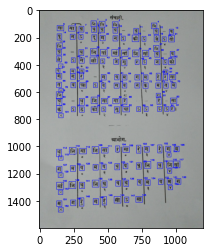

In [59]:
plt.imshow(notes)
plt.show()

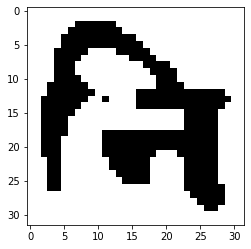

In [60]:
plt.imshow(passer[0])

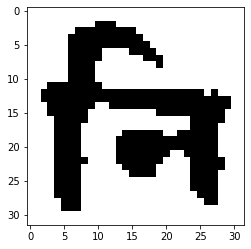

In [61]:
plt.imshow(passer[1])

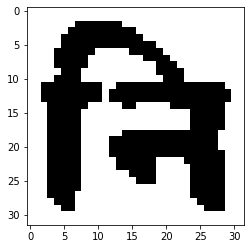

In [62]:
plt.imshow(passer[2])

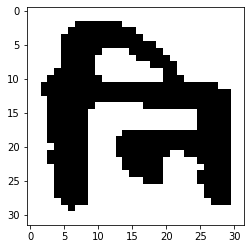

In [63]:
plt.imshow(passer[3])

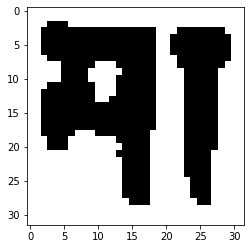

In [64]:
plt.imshow(passer[4])

In [65]:
passer = np.array(passer)

passer = passer / 255

In [66]:
result = model.predict(passer)

In [67]:
label_result = [np.argmax(i) for i in result]

In [68]:
notes_array = [hindi_name_dict[i] for i in label_result]
for i in range(len(notes_array)):
  print(i+1,notes_array[i])

1 dha
2 dha
3 dha
4 dha
5 ni
6 ma
7 dha
8 dha
9 dha
10 dha
11 dha
12 dha
13 pa
14 sa
15 ni
16 re
17 re
18 sa
19 sa
20 ga
21 ni
22 ni
23 re
24 re
25 re
26 dha
27 ni
28 ni
29 dha
30 sa
31 dha
32 ni
33 ni
34 ni
35 ni
36 dha
37 pa
38 re
39 sa
40 re
41 ma
42 sa
43 re
44 ga
45 re
46 ni
47 re
48 dha
49 ma
50 dha
51 pa
52 ma
53 ga
54 ga
55 re
56 re
57 re
58 ga
59 ga
60 ga
61 pa
62 sa
63 ga
64 ma
65 ma
66 ni
67 sa
68 dha
69 re
70 ma
71 ni
72 ma
73 ma
74 ni
75 dha
76 ma
77 pa
78 dha
79 sa
80 ni
81 re
82 dha
83 sa
84 dha
85 re
86 dha
87 sa
88 sa
89 sa
90 re
91 re
92 dha
93 re
94 re
95 dha
96 re
97 re
98 re
99 ma
100 re
101 ni
102 re
103 re
104 ni
105 ga
106 sa
107 ga
108 re
109 sa
110 ni
111 sa
112 ma
113 dha
114 ma
115 dha
116 ni
117 ni
118 ni
119 dha
120 dha
121 pa
122 dha
123 pa
124 ma
125 pa
126 sa
127 ga
128 sa
129 re
130 ga
131 sa
132 pa
133 pa
134 pa
135 dha
136 dha
137 pa
138 sa
139 ni
140 ni
141 dha
142 ma
143 dha
144 sa
145 sa
146 re
147 re
148 re
149 ga
150 ga
151 pa
152 pa


In [69]:
music_translate = {
    'sa': 'C3',
    're': 'D3',
    'ga': 'E3',
    'ma': 'F3',
    'pa': 'G3',
    'dha': 'A3',
    'ni': 'B3',
}

In [70]:
western_notes = [music_translate[i] for i in notes_array]
western_notes

['A3',
 'A3',
 'A3',
 'A3',
 'B3',
 'F3',
 'A3',
 'A3',
 'A3',
 'A3',
 'A3',
 'A3',
 'G3',
 'C3',
 'B3',
 'D3',
 'D3',
 'C3',
 'C3',
 'E3',
 'B3',
 'B3',
 'D3',
 'D3',
 'D3',
 'A3',
 'B3',
 'B3',
 'A3',
 'C3',
 'A3',
 'B3',
 'B3',
 'B3',
 'B3',
 'A3',
 'G3',
 'D3',
 'C3',
 'D3',
 'F3',
 'C3',
 'D3',
 'E3',
 'D3',
 'B3',
 'D3',
 'A3',
 'F3',
 'A3',
 'G3',
 'F3',
 'E3',
 'E3',
 'D3',
 'D3',
 'D3',
 'E3',
 'E3',
 'E3',
 'G3',
 'C3',
 'E3',
 'F3',
 'F3',
 'B3',
 'C3',
 'A3',
 'D3',
 'F3',
 'B3',
 'F3',
 'F3',
 'B3',
 'A3',
 'F3',
 'G3',
 'A3',
 'C3',
 'B3',
 'D3',
 'A3',
 'C3',
 'A3',
 'D3',
 'A3',
 'C3',
 'C3',
 'C3',
 'D3',
 'D3',
 'A3',
 'D3',
 'D3',
 'A3',
 'D3',
 'D3',
 'D3',
 'F3',
 'D3',
 'B3',
 'D3',
 'D3',
 'B3',
 'E3',
 'C3',
 'E3',
 'D3',
 'C3',
 'B3',
 'C3',
 'F3',
 'A3',
 'F3',
 'A3',
 'B3',
 'B3',
 'B3',
 'A3',
 'A3',
 'G3',
 'A3',
 'G3',
 'F3',
 'G3',
 'C3',
 'E3',
 'C3',
 'D3',
 'E3',
 'C3',
 'G3',
 'G3',
 'G3',
 'A3',
 'A3',
 'G3',
 'C3',
 'B3',
 'B3',
 'A3',
 'F3',
 'A3',

In [71]:
!pip install music21

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
import music21

In [73]:
offset = 0
output_notes = []

for value in western_notes:
    new_note = music21.note.Note(value)
    new_note.offset = offset
    new_note.storedInstrument = music21.instrument.Piano()
    output_notes.append(new_note)
    offset += 0.5

In [74]:
midi_stream = music21.stream.Stream()
for note in output_notes:
  midi_stream.append(note)

In [75]:
fp = midi_stream.write('midi', fp='test_output.mid')

In [76]:
import IPython

In [78]:
IPython.display.Audio('/content/test_output.mp3')